# Data Analyst au sein de la FAO

lien du brief : https://simplonline.co/briefs/688fc302-e4d4-4324-8904-f22316c31713



lien du dossier git : https://github.com/data-IA-2023/Groupe-3


Vous venez d'intégrer la FAO (Food and Agriculture Organization of the United Nations). BRAVO !!!!!!
Vous allez mener votre première mission en analysant les données mondiales de production agricole, d'alimentation et de nutrition.

**Livrables**

* Un dépôt Github
* Un notebook **fonctionnel, documenté et commenté**
* Une présentation écrite et orale résumant vos travaux, votre analyse et vos recommandations

**Contexte du projet**

* Au sein du service Data Analytics and Prospective de la FAO, vous êtes en charge d'analyser les données produites par les Nations Unies.

* Ces analyses conduisent à des rapports de synthèse à destination des décideurs.

* Pour êtes également en charge de la partie Prospective, c'est à dire donner des tendances et des évolutions probables quant à la production agricole, à l'alimentation et la nutrition mondiales.


**Ressource(s)**

FAO - Wikipedia : https://fr.wikipedia.org/wiki/Organisation_des_Nations_unies_pour_l'alimentation_et_l'agriculture

FAOSTAT : https://www.fao.org/faostat/fr/#home

Les données FAO 2013 : https://github.com/remijul/dataset/tree/master/fao_2013

## Partie traitement des données

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Chargement des données avec définition de l'index et changement des types des  dimensions
url_bd="https://github.com/remijul/dataset/raw/4156ed0c38c1f5e81b3bf8e6458a245c5fa6c35a/"
#url_bd=""

chemein_BD_vegetal = url_bd+"fao_2013/FAOSTAT_2013_vegetal.csv"
FAOSTAT_2013_vegetal = pd.read_csv(chemein_BD_vegetal, sep=',',on_bad_lines='skip',dtype={'Code Pays': str,'Code Élément': str,'Code Produit':str, 'Année':str, 'Code Année':str})

chemein_BD = url_bd+"fao_2013/FAOSTAT_2013_animal.csv"
FAOSTAT_2013_animal = pd.read_csv(chemein_BD, sep=',',on_bad_lines='skip',dtype={'Code Pays': str,'Code Élément': str,'Code Produit':str, 'Code année':str, 'Année':str})

chemein_BD = url_bd+"fao_2013/FAOSTAT_2013_cereal.csv"
FAOSTAT_2013_cereal = pd.read_csv(chemein_BD, sep=',',on_bad_lines='skip',dtype={'Code Pays': str,'Code Élément': str,'Code Produit': str,'Code Année': str,'Année': str})

chemein_BD = url_bd+"fao_2013/FAOSTAT_2013_population.csv"
FAOSTAT_2013_population = pd.read_csv(chemein_BD, sep=',',on_bad_lines='skip',dtype={'Country Code': str,'Element Code': str,'Item Code': str,'Year Code': str,'Year': str})

chemein_BD = url_bd+"fao_2013/FAOSTAT_2013_sous_alimentation.csv"
FAOSTAT_2013_sous_alimentation = pd.read_csv(chemein_BD, sep=',',on_bad_lines='skip',dtype={'Code zone': str,'Code Élément': str,'Code Produit': str,'Code année': str,'Année': str})



In [164]:
color_list_bar = ['#039be5', '#ffeb38', '#8bc34a']
color_list_rgb = ['rgb(3,155,229)', 'rgb(255,235,56)', 'rgb(139,195,74)']

### 1 - Etude guidée n°1

Il s’agit ici de répondre à toutes les questions ci-dessous.

#### Question 1 : Nombre d'humains sur la planète
Calculez le nombre total d’humains sur la planète.
Critiquez votre résultat. En cas d’anomalie, analysez et effectuer les corrections nécessaires.
Donnez le résultat de votre calcul pour l'année 2013.

In [165]:
Totalpopulation=FAOSTAT_2013_population['Value'].sum()*1000
print(f"Le nombre d'humains sur la planète est: {Totalpopulation}")

Le nombre d'humains sur la planète est: 8413993000


Le resultat affiché est :

    Le nombre d'humains sur la planète est: 8413993000

Il y a donc un problème dans les données, après exploration, nous avons trouvé la ligne 'chine' désignée comme agrégat de 4 autre ligne.

In [166]:
FAOSTAT_2013_population.drop(FAOSTAT_2013_population[FAOSTAT_2013_population['Flag']=='A'].index, inplace=True)
Totalpopulation=FAOSTAT_2013_population['Value'].sum()*1000
print(f"Le nombre d'humains sur la planète est: {Totalpopulation}")

Le nombre d'humains sur la planète est: 6997326000


Après suprétion de la ligne 'agrégat', nous obtenons :

    Le nombre d'humains sur la planète est: 6997326000

In [167]:
# Création des labels et des valeurs
FAOSTAT_2013_population.sort_values(by='Value', ascending=False, inplace=True )
label_px = {'x':'pays', 'y':"population (nombre d'humains)"}

# Création du graphique
fig = px.bar(x=FAOSTAT_2013_population.head(20).Country, y=FAOSTAT_2013_population.head(20).Value*1000000, 
            height=1000, color_discrete_sequence=color_list_bar, labels=label_px,
            title="Population pour les 20 pays les plus peuplés")

# Mise à l'échel et affichage du graphique
fig.update_layout(
    autosize=False,
    width=1400,
    height=800
)
fig.show()


Nous avons suprimé la ligne 'agrégat' dans tout notre jeu de données

In [168]:
# Supprimer les agrégats
FAOSTAT_2013_animal.drop(FAOSTAT_2013_animal[FAOSTAT_2013_animal['Symbole']=='A'].index, inplace=True)
FAOSTAT_2013_cereal.drop(FAOSTAT_2013_cereal[FAOSTAT_2013_cereal['Symbole']=='A'].index, inplace=True)
FAOSTAT_2013_population.drop(FAOSTAT_2013_population[FAOSTAT_2013_population['Flag']=='A'].index, inplace=True)
FAOSTAT_2013_vegetal.drop(FAOSTAT_2013_vegetal[FAOSTAT_2013_vegetal['Symbole']=='A'].index, inplace=True)

# Pour sous population il n'y a pas de symbole alors en utilise Zone
FAOSTAT_2013_sous_alimentation.drop(FAOSTAT_2013_sous_alimentation[FAOSTAT_2013_sous_alimentation['Zone']=='Chine'].index, inplace=True)

#### Question 2 : Redondances
Identifiez ces redondances, en donnant votre réponse sous forme de formule mathématique (pas besoin de coder ici).
C'est une équation à 3 termes de type (a_1 + a2 + [...] = b_1 + b_2 + [...] = c_1 + c_2 + [...]) ) faisant intervenir chacune des 11 quantités données ci dessus.
Illustrez cette équation avec l'exemple du blé en France.

-Pour les données de Animal, Cereal et Vegetal, nous avons obtenu :

    Production + 'Importations - Quantité' + Variation de stock = 'Aliments pour animaux' + 'Autres Utilisations' + Nourriture + Pertes + Semences + Traitement + 'Exportations - Quantité'

    'Aliments pour animaux' + 'Autres Utilisations' + Nourriture + Pertes + Semences + Traitement = 'Disponibilité intérieure'

    'Disponibilité intérieure' + 'Exportations - Quantité' = Production + 'Importations - Quantité' + Variation de stock
    Production + Importations - Exportations + Variation de stock= Disponibilité intérieure

Pour vérifié, nous avons pris pour exemple le blé en france :

In [169]:
# Crée la data frame pour le blé en france
df_france=FAOSTAT_2013_cereal[FAOSTAT_2013_cereal['Pays']=='France']
df_france=df_france[df_france['Symbole']=='S']
df_france=df_france[df_france['Produit']=='Blé']

# Réccupère les valeurs
Production=df_france[df_france['Élément']=='Production']['Valeur'].sum()
Importations=df_france[df_france['Élément']=='Importations - Quantité']['Valeur'].sum()
Variation=df_france[df_france['Élément']=='Variation de stock']['Valeur'].sum()

Aliments_animaux=df_france[df_france['Élément']=='Aliments pour animaux']['Valeur'].sum()
Autres_Utilisations=df_france[df_france['Élément']=='Autres Utilisations']['Valeur'].sum()
Nourriture=df_france[df_france['Élément']=='Nourriture']['Valeur'].sum()
Pertes=df_france[df_france['Élément']=='Pertes']['Valeur'].sum()
Semences=df_france[df_france['Élément']=='Semences']['Valeur'].sum()
Traitement=df_france[df_france['Élément']=='Traitement']['Valeur'].sum()
Exportations=df_france[df_france['Élément']=='Exportations - Quantité']['Valeur'].sum()
Disponibilité=df_france[df_france['Élément']=='Disponibilité intérieure']['Valeur'].sum()

# Affichage des résultats
print(f"la somme de Production + Importations - Quantité' + Variation de stock est {Production+Importations+Variation}")
print(f"la somme de 'Aliments pour animaux' + 'Autres Utilisations' + Nourriture + Pertes + Semences + Traitement + 'Exportations - Quantité' est {Aliments_animaux+Autres_Utilisations+Nourriture+Pertes+Semences+Traitement+Exportations}")
print(f"Production + Importations - Exportations + Variation de stock= {Production+Importations-Exportations+Variation }")
print(f"Disponibilité = {Disponibilité}")

la somme de Production + Importations - Quantité' + Variation de stock est 41800.0
la somme de 'Aliments pour animaux' + 'Autres Utilisations' + Nourriture + Pertes + Semences + Traitement + 'Exportations - Quantité' est 41800.0
Production + Importations - Exportations + Variation de stock= 20298.0
Disponibilité = 20298.0


Nous obtenons comme résultat :

    la somme de Production + Importations - Quantité' + Variation de stock est 41800.0
    la somme de 'Aliments pour animaux' + 'Autres Utilisations' + Nourriture + Pertes + Semences + Traitement + 'Exportations - Quantité' est 41800.0
    Production + Importations - Exportations + Variation de stock= 20298.0
    Disponibilité = 20298.0

Ces résultats valide nos observations.

#### Question 3 : Disponibilité alimentaire (calories, protéines)
Calculez (pour chaque pays et chaque produit) la disponibilité alimentaire en kcal puis en kg de protéines. Vous ferez cela à partir de ces informations :
- Population de chaque pays
- Disponibilité alimentaire donnée pour chaque produit et pour chaque pays en kcal/personne/jour, -
- Disponibilité alimentaire en protéines donnée pour chaque produit et pour chaque pays en g/personne/jour.
Pour cette étape vous avez besoin de constituer une seule et même table à partir des tables animaux et végétaux.

In [170]:
# Population de chaque pays
dPopulation=FAOSTAT_2013_population
dPopulation=dPopulation[['Country Code', 'Country', 'Value']]
dPopulation.loc[:,'Value']=FAOSTAT_2013_population['Value']*1000 

dPopulation

,Country Code,Country,Value
34,41,"China, mainland",1385567000
73,100,India,1252140000
165,231,United States of America,320051000
74,101,Indonesia,249866000
21,21,Brazil,200362000
...,...,...,...
85,83,Kiribati,102000
4,8,Antigua and Barbuda,90000
47,55,Dominica,72000
17,17,Bermuda,65000


In [171]:

# Création du graphique
label_px = {'x':'pays', 'y':'population'}
dPopulation.sort_values(by='Value', ascending=False, inplace=True )
fig = px.bar(x=dPopulation.head(10).Country, color_discrete_sequence=color_list_bar, y=dPopulation.head(10).Value, 
             height=1000, title="Population pour les 10 pays les plus peuplés", labels=label_px)

# Mise à l'échel et affichage du graphique
fig.update_layout(
    autosize=False,
    width=1000,
    height=800
)
fig.show()

C:\Users\MOHAM\AppData\Local\Temp\ipykernel_9260\680884935.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [172]:
# Céation de la data frame des table animaux et végéteaux
df_veg_an = pd.concat([FAOSTAT_2013_vegetal, FAOSTAT_2013_animal])
df_3_1 = df_veg_an[['Code Pays', 'Pays', 'Élément', 'Code Produit', 'Produit', 'Valeur']]
df_3_1 = df_3_1[df_3_1['Élément']=='Disponibilité alimentaire (Kcal/personne/jour)']

# La data frame est mergé
merged_df = df_3_1.merge(dPopulation, left_on='Code Pays', right_on='Country Code')
merged_df= merged_df[['Code Pays', 'Pays', 'Value','Élément', 'Code Produit', 'Produit', 'Valeur']]
merged_df.rename(columns={'Value': 'Population'}, inplace=True)

merged_df = merged_df.assign(Kcal=merged_df['Valeur']*merged_df['Population']*365)

# Création de 'm_df_kcal'
m_df_kcal=merged_df
m_df_kcal


,Code Pays,Pays,Population,Élément,Code Produit,Produit,Valeur,Kcal
0,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2511,Blé,1369.0,1.526638e+13
1,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2805,Riz (Eq Blanchi),141.0,1.572359e+12
2,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2513,Orge,26.0,2.899385e+11
3,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2514,Maïs,21.0,2.341811e+11
4,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2517,Millet,3.0,3.345444e+10
...,...,...,...,...,...,...,...,...
14236,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2764,"Poissons Marins, Autres",0.0,0.000000e+00
14237,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2765,Crustacés,0.0,0.000000e+00
14238,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2766,Cephalopodes,0.0,0.000000e+00
14239,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2767,"Mollusques, Autres",0.0,0.000000e+00


In [173]:
# Création des labels et des valeurs
df=m_df_kcal[m_df_kcal['Produit']=='Blé']
label_px = {'x':'pays', 'y':'Disponibilité alimentaire (kcal)'}

# Création du graphique
df.sort_values(by='Kcal', ascending=False, inplace=True )
df.head(10)
fig = px.bar(x=df.head(10).Pays, y=df.head(10).Kcal, height=1000, color_discrete_sequence=color_list_bar,
             title="Disponibilité alimentaire (kcal) pour les 10 pays les plus peuplés", labels=label_px)

# Mise à l'échel et affichage du graphique
fig.update_layout(
    autosize=False,
    width=1000,
    height=800
)
fig.show()

C:\Users\MOHAM\AppData\Local\Temp\ipykernel_9260\1168516681.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [174]:
m_df_kcal

,Code Pays,Pays,Population,Élément,Code Produit,Produit,Valeur,Kcal
0,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2511,Blé,1369.0,1.526638e+13
1,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2805,Riz (Eq Blanchi),141.0,1.572359e+12
2,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2513,Orge,26.0,2.899385e+11
3,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2514,Maïs,21.0,2.341811e+11
4,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2517,Millet,3.0,3.345444e+10
...,...,...,...,...,...,...,...,...
14236,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2764,"Poissons Marins, Autres",0.0,0.000000e+00
14237,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2765,Crustacés,0.0,0.000000e+00
14238,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2766,Cephalopodes,0.0,0.000000e+00
14239,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2767,"Mollusques, Autres",0.0,0.000000e+00


In [175]:
# Création des labels et des valeurs
df_kcal=m_df_kcal[['Code Pays', "Pays", 'Population', 'Code Produit', 'Produit', "Kcal"]]
df_kcal=df_kcal[df_kcal['Pays']=='France']
label_px = {'x':'produit', 'y':'Disponibilité alimentaire (kcal)'}
df_kcal.sort_values(by='Kcal', ascending=False, inplace=True )
df_kcal.head(10)

# Création du graphique
fig = px.bar(x=df_kcal.head(10).Produit, y=df_kcal.head(10).Kcal, height=1000, color_discrete_sequence=color_list_bar,
             title="Disponibilité alimentaire (kcal) pour la France pour les 10 produits les plus importent en quantité", labels=label_px)

# Mise à l'échel et affichage du graphique
fig.update_layout(
    autosize=False,
    width=1000,
    height=800
)
fig.show()


In [176]:
# Céation de la data frame des table animaux et végéteaux
df3_2 = df_veg_an[['Code Pays', 'Pays', 'Élément', 'Code Produit', 'Produit', 'Valeur']]
df3_2 = df3_2[df3_2['Élément']=='Disponibilité de protéines en quantité (g/personne/jour)']

# La data frame est mergé
merged_df = df3_2.merge(dPopulation, left_on='Code Pays', right_on='Country Code')
merged_df= merged_df[['Code Pays', 'Pays', 'Value','Élément', 'Code Produit', 'Produit', 'Valeur']]
merged_df.rename(columns={'Value': 'Population'}, inplace=True)

merged_df = merged_df.assign(protéinesKg=(merged_df['Valeur']/1000)*merged_df['Population']*365)
merged_df = merged_df.assign(protéinesg=(merged_df['Valeur'])*merged_df['Population']*365)
merged_df

# Création de 'm_df_protéinesKg'
m_df_protéinesKg=merged_df[['Code Pays', "Pays", 'Code Produit', 'Produit', "protéinesKg", "protéinesg"]]
m_df_protéinesKg


,Code Pays,Pays,Code Produit,Produit,protéinesKg,protéinesg
0,2,Afghanistan,2511,Blé,411601126.8,4.116011e+11
1,2,Afghanistan,2805,Riz (Eq Blanchi),30108996.0,3.010900e+10
2,2,Afghanistan,2513,Orge,8809669.2,8.809669e+09
3,2,Afghanistan,2514,Maïs,6244828.8,6.244829e+09
4,2,Afghanistan,2517,Millet,892118.4,8.921184e+08
...,...,...,...,...,...,...
11556,181,Zimbabwe,2764,"Poissons Marins, Autres",154942.5,1.549425e+08
11557,181,Zimbabwe,2765,Crustacés,0.0,0.000000e+00
11558,181,Zimbabwe,2766,Cephalopodes,0.0,0.000000e+00
11559,181,Zimbabwe,2767,"Mollusques, Autres",0.0,0.000000e+00


In [177]:
# Création des labels et des valeurs
df=m_df_protéinesKg
df=df[df['Produit']=='Blé']
label_px = {'x':'pays', 'y':'Disponibilité alimentaire (kg)'}

# Création du graphique
df.sort_values(by='protéinesg', ascending=False, inplace=True )
df_kcal.head(10)
fig = px.bar(x=df.head(10).Pays,y=df.head(10).protéinesg, height=1000, color_discrete_sequence=color_list_bar,
             title="Disponibilité alimentaire (kg) pour le blé pour les 10 pays principaux", labels=label_px)

# Mise à l'échel et affichage du graphique
fig.update_layout(
    autosize=False,
    width=1000,
    height=800
)
fig.show()

C:\Users\MOHAM\AppData\Local\Temp\ipykernel_9260\2042636906.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [178]:
# Création des labels et des valeurs
df=m_df_protéinesKg
df=df[df['Pays']=='France']
label_px = {'x':'produit', 'y':'Disponibilité alimentaire (kg)'}

# Création du graphique
df.sort_values(by='protéinesg', ascending=False, inplace=True )
df_kcal.head(10)
fig = px.bar(x=df.head(10).Produit,y=df.head(10).protéinesg, height=1000, color_discrete_sequence=color_list_bar,
             title="Disponibilité alimentaire (kg) pour la France pour les 10 produits principaux", labels=label_px)

# Mise à l'échel et affichage du graphique
fig.update_layout(
    autosize=False,
    width=1000,
    height=800
)
fig.show()


C:\Users\MOHAM\AppData\Local\Temp\ipykernel_9260\4096605816.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [179]:
# Céation de la data frame des table animaux et végéteaux
df3_3 = df_veg_an[['Code Pays', 'Pays', 'Élément', 'Code Produit', 'Produit', 'Valeur']]
df3_3 = df3_3[df3_3['Élément']=='Disponibilité alimentaire en quantité (kg/personne/an)']

# La data frame est mergé
merged_df = df3_3.merge(dPopulation, left_on='Code Pays', right_on='Country Code')
merged_df= merged_df[['Code Pays', 'Pays', 'Value','Élément', 'Code Produit', 'Produit', 'Valeur']]
merged_df.rename(columns={'Value': 'Population'}, inplace=True)

merged_df = merged_df.assign(Kg=merged_df['Valeur']*merged_df['Population'])
merged_df

# Création de 'm_df_Kg'
m_df_Kg=merged_df[['Code Pays', "Pays", 'Élément', 'Code Produit', 'Produit', "Kg"]]
m_df_Kg

,Code Pays,Pays,Élément,Code Produit,Produit,Kg
0,2,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,2511,Blé,4.895347e+09
1,2,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,2805,Riz (Eq Blanchi),4.222286e+08
2,2,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,2513,Orge,8.921184e+07
3,2,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,2514,Maïs,7.638000e+07
4,2,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,2517,Millet,1.222080e+07
...,...,...,...,...,...,...
14010,181,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,2764,"Poissons Marins, Autres",1.698000e+06
14011,181,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,2765,Crustacés,0.000000e+00
14012,181,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,2766,Cephalopodes,0.000000e+00
14013,181,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,2767,"Mollusques, Autres",1.415000e+05


#### Question 4 : Ratio énergie/poids
A partir de ces dernières informations, et à partir du poids de la disponibilité alimentaire (pour chaque pays et chaque produit), calculez pour chaque produit le ratio "énergie/poids", que vous donnerez en kcal/kg. Vous pouvez vérifier la cohérence de votre calcul en comparant ce ratio aux données disponibles sur internet, par exemple en cherchant la valeur calorique d'un oeuf.

In [180]:
# Création de la data frame et traitement des valeur 0
df_cal_g = m_df_kcal.merge(m_df_Kg, on=['Code Pays', 'Code Produit'])
df_cal_g=df_cal_g[(df_cal_g['Kcal']!=0)&(df_cal_g['Kg']!=0)] #supprimer les lignes avec valeurs = 0

df_cal_g= df_cal_g.assign(cal_g=df_cal_g['Kcal']/(df_cal_g['Kg']))
df_cal_g=df_cal_g[['Code Pays', 'Pays_x', 'Code Produit', 'Produit_x','Kcal', 'Kg','cal_g']]
df_cal_g.rename(columns={'Pays_x': 'Pays', 'Produit_x': 'Produit'}, inplace=True)

# Exemple des valeur 0
meancalg=df_cal_g[(df_cal_g['Produit']=='Oeufs')].cal_g.mean()
print(meancalg)



1364.8177721733787


Nous obtenons comme résultat :

    1364.8177721733787

La valeur de référence est de 140 kcal pour 100g d'oeuf soit 1400 kcal/kg. Nos résultats semblent donc correcte.

In [181]:
df_cal_g

,Code Pays,Pays,Code Produit,Produit,Kcal,Kg,cal_g
0,2,Afghanistan,2511,Blé,1.526638e+13,4.895347e+09,3118.548337
1,2,Afghanistan,2805,Riz (Eq Blanchi),1.572359e+12,4.222286e+08,3723.950796
2,2,Afghanistan,2513,Orge,2.899385e+11,8.921184e+07,3250.000000
3,2,Afghanistan,2514,Maïs,2.341811e+11,7.638000e+07,3066.000000
4,2,Afghanistan,2517,Millet,3.345444e+10,1.222080e+07,2737.500000
...,...,...,...,...,...,...,...
13983,181,Zimbabwe,2737,Graisses Animales Crue,1.291188e+11,1.683850e+07,7668.067227
13986,181,Zimbabwe,2744,Oeufs,3.098850e+10,2.476250e+07,1251.428571
13987,181,Zimbabwe,2848,Lait - Excl Beurre,2.530728e+11,4.513850e+08,560.658307
13988,181,Zimbabwe,2761,Poissons Eau Douce,2.065900e+10,2.900750e+07,712.195122


In [182]:
# Création des labels et des valeurs
df=df_cal_g[(df_cal_g['Produit']=='Oeufs')]
label_px = {'x':"produit", 'name':"ratio énergie/poid (kcal/kg)"}

# Création du graphique
fig = go.Figure()
fig.add_trace(go.Box(
    x=df['Produit'],
    y=df['cal_g'],
    name='ratio énergie/poid (kcal/kg)',
    marker_color='rgb(255,235,56)',
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', 
    line_color='rgb(3,155,229)',
    boxmean=True
))
fig.update_layout(title_text="ratio énergie/poids (kcal/kg) des oeufs",
                  yaxis_title='ratio énergie/poids (kcal/kg)',)

# Mise à l'échel et affichage du graphique
fig.update_layout(
    autosize=False,
    width=1000,
    height=800
)
fig.show()

In [183]:
# Proteine par produit
df_Pro_p = m_df_protéinesKg.merge(m_df_Kg, on=['Code Pays', 'Code Produit'])

df_Pro_p=df_Pro_p[(df_Pro_p['protéinesKg']!=0)&(df_Pro_p['Kg']!=0)]

df_Pro_p= df_Pro_p.assign(protéines=(df_Pro_p['protéinesKg']/df_Pro_p['Kg'])) #% de proteines
df_Pro_p=df_Pro_p[['Code Pays', 'Pays_x', 'Code Produit', 'Produit_x', 'protéinesKg', 'Kg', 'protéines']]
df_Pro_p.rename(columns={'Pays_x': 'Pays', 'Produit_x': 'Produit'}, inplace=True)

df_Pro_p[(df_Pro_p['Produit']=='Blé') & (df_Pro_p['Pays']=='France')]

,Code Pays,Pays,Code Produit,Produit,protéinesKg,Kg,protéines
3941,68,France,2511,Blé,6.098869e+08,6.971073e+09,0.087488


In [184]:
# Création des labels et des valeurs
df=df_Pro_p[df_Pro_p['Produit']=='Oeufs']
label_px = {'x':"Produit", 'name':"taux de protéines (kg)"}

# Création du graphique
fig = go.Figure()
fig.add_trace(go.Box(
    x=df['Produit'],
    y=df['protéines']*100,
    name='taux de protéines (%)',
    marker_color='rgb(255,235,56)',
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', 
    line_color='rgb(3,155,229)',
    boxmean=True
))
fig.update_layout(title_text="taux de protéines (%) des oeufs",
                  yaxis_title='taux de protéines (%)',)

# Mise à l'échel et affichage du graphique
fig.update_layout(
    autosize=False,
    width=1000,
    height=800
)
fig.show()

Nous obtenons un taux de protéine moyen de 10.7%, les valeurs de références en france sont de 13%. Nos valeurs semblent donc cohérente.

#### Question 5 : Aliments les plus caloriques et protéiques
En considérant les aliments végétaux et animaux, citez 5 aliments parmi les 20 aliments les plus caloriques, en utilisant le ratio énergie/poids. Citez 5 aliments parmi les 20 aliments les plus riches en protéines.

In [185]:
# Création des labels et des valeurs
df=df_cal_g[["Produit", "cal_g"]]
df=df.groupby(["Produit"]).quantile(0.5)
df = df.reset_index()
df.sort_values(by='cal_g', ascending=False, inplace=True )
label_px = {'x':'produit', 'y':'ratio énergie/poids (kcal/kg)'}

# Création du graphique
fig = px.bar(x=df.head(20).Produit,y=df.head(20).cal_g,height=1000, color_discrete_sequence=color_list_bar,
             title="20 produits les plus caloriques", labels=label_px)

# Mise à l'échel et affichage du graphique
fig.update_layout(
    autosize=False,
    width=1000,
    height=800
)
fig.show()

df.head(20)

,Produit,cal_g
43,Huiles de Foie de Poisso,9866.246499
40,Huile de Son de Riz,9125.000000
41,Huile de Sésame,9125.000000
44,Huiles de Poissons,8892.362637
34,Huile de Coco,8861.778846
36,Huile de Germe de Maïs,8848.484848
33,Huile d'Olive,8844.164299
42,Huile de Tournesol,8841.390114
39,Huile de Soja,8841.111111
32,Huile d'Arachide,8839.843750


Parmis les aliment les plus calorique, nous avons trouvé des huiles(foie de poisson, riz, sésame, poisson, maïs, olive, tournesol et soja), les graisse animales crue, le beurre, le sésame et les arachides décortiquée.

In [186]:
m_df_protéinesKg

,Code Pays,Pays,Code Produit,Produit,protéinesKg,protéinesg
0,2,Afghanistan,2511,Blé,411601126.8,4.116011e+11
1,2,Afghanistan,2805,Riz (Eq Blanchi),30108996.0,3.010900e+10
2,2,Afghanistan,2513,Orge,8809669.2,8.809669e+09
3,2,Afghanistan,2514,Maïs,6244828.8,6.244829e+09
4,2,Afghanistan,2517,Millet,892118.4,8.921184e+08
...,...,...,...,...,...,...
11556,181,Zimbabwe,2764,"Poissons Marins, Autres",154942.5,1.549425e+08
11557,181,Zimbabwe,2765,Crustacés,0.0,0.000000e+00
11558,181,Zimbabwe,2766,Cephalopodes,0.0,0.000000e+00
11559,181,Zimbabwe,2767,"Mollusques, Autres",0.0,0.000000e+00


In [187]:
# Création des labels et des valeurs
df=m_df_protéinesKg[["Produit", "protéinesKg"]]
df=df.groupby(["Produit"]).quantile(0.5)
label_px = {'x':'produit', 'y':'ratio énergie/poids (kcal/kg)'}
df = df.reset_index()
df.sort_values(by='protéinesKg', ascending=False, inplace=True )

# Création du graphique
fig = px.bar(x=df.head(20).Produit, y=df.head(20).protéinesKg, height=1000, color_discrete_sequence=color_list_bar,
             title="20 produits les plus protéiques", labels=label_px)

# Mise à l'échel et affichage du graphique
fig.update_layout(
    autosize=False,
    width=1000,
    height=800
)
fig.show()

df.head(5)

,Produit,protéinesKg
11,Blé,3.561194e+07
47,Lait - Excl Beurre,2.360373e+07
90,Viande de Bovins,1.098170e+07
92,Viande de Volailles,1.021646e+07
51,Maïs,7.710625e+06


Parmis les aliment les plus protéiques, nous avons trouvé le blé, le lait, les viandes( bovine et volailles), le maïs et le riz.

#### Question 6 : Dispo. intérieure mondiale des végétaux
Calculez, pour les produits végétaux uniquement, la disponibilité intérieure mondiale exprimée en kcal.

In [188]:
# Création de la data frame
dfKcal=FAOSTAT_2013_vegetal[FAOSTAT_2013_vegetal['Élément']=='Disponibilité alimentaire (Kcal/personne/jour)']
dfKcal = dfKcal.merge(dPopulation, left_on='Code Pays', right_on='Country Code')
dfKcal.rename(columns={'Value': 'Population'}, inplace=True)

dfKcal=dfKcal.assign(Kcal=dfKcal['Valeur']*dfKcal['Population']*365)

dfKcal=dfKcal[['Produit', 'Kcal']]
dfKcal=dfKcal.groupby("Produit", group_keys=False).sum()
dfKcal.sort_values('Kcal', ascending=False, inplace=True)
dfKcal = dfKcal.reset_index()

dfKcal

,Produit,Kcal
0,Riz (Eq Blanchi),1.381005e+15
1,Blé,1.345279e+15
2,Sucre Eq Brut,5.109690e+14
3,Maïs,3.766566e+14
4,Huile de Soja,2.103646e+14
...,...,...
69,Poivre,7.878098e+11
70,Girofles,4.482236e+10
71,Palmistes,3.416035e+10
72,"Sucre, betterave",2.873499e+10


In [189]:
print(dfKcal['Kcal'].sum(), 'kcal')

6051609427075000.0 kcal


Nous avons obtenu pour résultat :

    6051609427075000.0 kcal

In [190]:

# Création des labels et des valeurs
df=dfKcal
label_px = {'x':'produit', 'y':'Disponibilité alimentaire mondiale (kcal)'}
df.sort_values(by='Kcal', ascending=False, inplace=True )
df_kcal.head(10)

# Création du graphique
fig = px.bar(x=df.head(10).Produit,y=df.head(10).Kcal, height=1000, color_discrete_sequence=color_list_bar,
             title="Disponibilité alimentaire mondiale (kcal) pour les 10 produits les plus importants", labels=label_px)

# Mise à l'échel et affichage du graphique
fig.update_layout(
    autosize=False,
    width=1000,
    height=800
)
fig.show()


#### Question 7 : Potentiel alimentaire des végétaux
Combien d'humains pourraient être nourris si toute la disponibilité intérieure mondiale de produits végétaux était utilisée pour de la nourriture ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

In [191]:
m_df_kcal

,Code Pays,Pays,Population,Élément,Code Produit,Produit,Valeur,Kcal
0,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2511,Blé,1369.0,1.526638e+13
1,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2805,Riz (Eq Blanchi),141.0,1.572359e+12
2,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2513,Orge,26.0,2.899385e+11
3,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2514,Maïs,21.0,2.341811e+11
4,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2517,Millet,3.0,3.345444e+10
...,...,...,...,...,...,...,...,...
14236,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2764,"Poissons Marins, Autres",0.0,0.000000e+00
14237,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2765,Crustacés,0.0,0.000000e+00
14238,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2766,Cephalopodes,0.0,0.000000e+00
14239,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2767,"Mollusques, Autres",0.0,0.000000e+00


In [192]:
m_df_protéinesKg

,Code Pays,Pays,Code Produit,Produit,protéinesKg,protéinesg
0,2,Afghanistan,2511,Blé,411601126.8,4.116011e+11
1,2,Afghanistan,2805,Riz (Eq Blanchi),30108996.0,3.010900e+10
2,2,Afghanistan,2513,Orge,8809669.2,8.809669e+09
3,2,Afghanistan,2514,Maïs,6244828.8,6.244829e+09
4,2,Afghanistan,2517,Millet,892118.4,8.921184e+08
...,...,...,...,...,...,...
11556,181,Zimbabwe,2764,"Poissons Marins, Autres",154942.5,1.549425e+08
11557,181,Zimbabwe,2765,Crustacés,0.0,0.000000e+00
11558,181,Zimbabwe,2766,Cephalopodes,0.0,0.000000e+00
11559,181,Zimbabwe,2767,"Mollusques, Autres",0.0,0.000000e+00


In [193]:
'''
Pour un homme : entre 2000 et 3000 Kcal/jour
Pour une femme : entre 1600 et 2400 Kcal/jour
on retient la moyenne de 2300 kcal/jour
https://www.webmd.com/diet/calories-chart

Les experts recommandent 60 à 100 grammes de protéines par jour on retient la moyenne de 80 grammes
https://www.health.harvard.edu/blog/how-much-protein-do-you-need-every-day-201506188096
'''
# Calcule des sommes 'valeur énergétique' et 'protéine' des végétaux dans le monde
Kcal_monde=m_df_kcal.Kcal.sum()
kg_monde=m_df_protéinesKg.protéinesKg.sum()
Totalpopulation=float(Totalpopulation)
besionKcal=float(2300*365)
besion_protéines_kg=(80/1000)*365

print(f"la valeur energitique vegetale monde est :{Kcal_monde.round(2)} kcal")
print(f"les protéines vegetale monde est :{kg_monde.round(2)} kg")

print(f"les besoin humain monde en caloris :{Totalpopulation*besionKcal} kcal")
print(f"les besoin humain monde en protéines :{Totalpopulation*besion_protéines_kg} kg")


la valeur energitique vegetale monde est :7363883420185000.0 kcal
les protéines vegetale monde est :207259180075.55 kg
les besoin humain monde en caloris :5874255177000000.0 kcal
les besoin humain monde en protéines :204321919200.0 kg


Nous trouvons comme résultat : 

    la valeur energitique vegetale monde est :7363883420185000.0 kcal
    les protéines vegetale monde est :207259180075.55 kg
    les besoin humain monde en caloris :5874255177000000.0 kcal
    les besoin humain monde en protéines :204321919200.0 kg

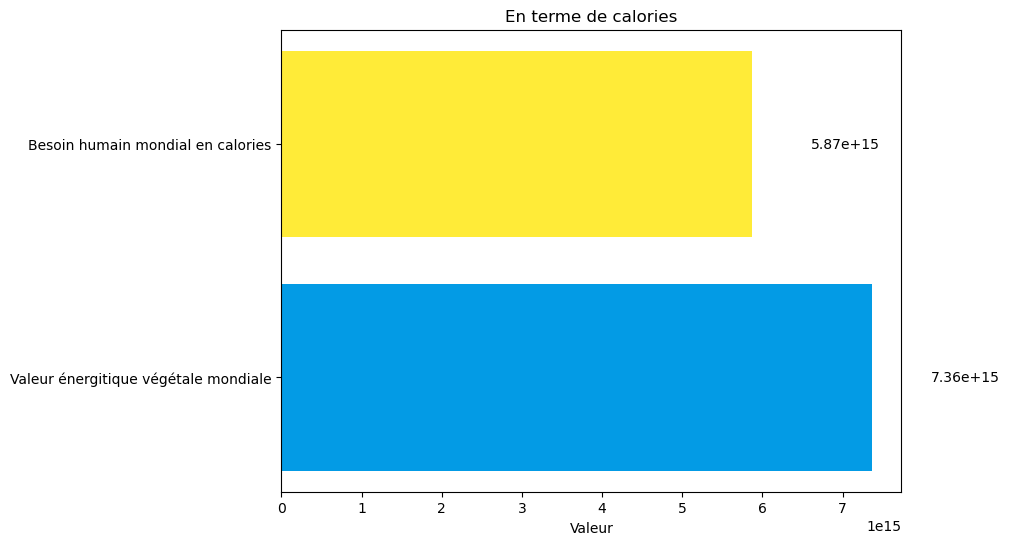

In [194]:
# Provided data
categories = ['Valeur énergitique végétale mondiale', 'Besoin humain mondial en calories']
calories_need = Kcal_monde
vegetable_energy = Totalpopulation*besionKcal

# Plotting a horizontal bar chart (pal)
plt.figure(figsize=(8, 6))
plt.barh(categories, [calories_need,vegetable_energy], color=['#039be5', '#ffeb38'])
plt.xlabel('Valeur')
plt.title('En terme de calories')

# Adding values beside the bars
for i, need in enumerate([calories_need, vegetable_energy]):
    plt.text(need + 0.1 * max([calories_need, vegetable_energy]), i, f'{need:.2e}', ha='left', va='center')

plt.show()

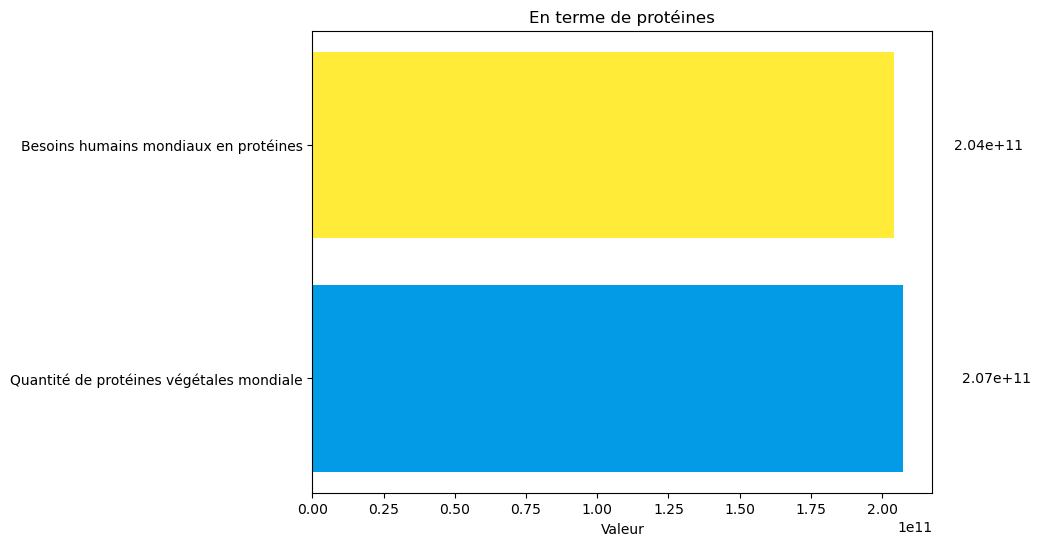

In [195]:
# Provided data
categories = ['Quantité de protéines végétales mondiale', 'Besoins humains mondiaux en protéines']
calories_need = kg_monde
vegetable_energy = Totalpopulation*besion_protéines_kg

# Plotting a horizontal bar chart (pal)
plt.figure(figsize=(8, 6))
plt.barh(categories, [calories_need,vegetable_energy], color=['#039be5', '#ffeb38'])
plt.xlabel('Valeur')
plt.title('En terme de protéines')

# Adding values beside the bars
for i, need in enumerate([calories_need, vegetable_energy]):
    plt.text(need + 0.1 * max([calories_need, vegetable_energy]), i, f'{need:.2e}', ha='left', va='center')

plt.show()

In [196]:
# Calcule du nombre d'humains que l'on peut nourrir
population_cal=Kcal_monde/besionKcal
population_kg=kg_monde/besion_protéines_kg

print(f"La population mondiale est {Totalpopulation}")

print(f"Nombre d'humains nourris en caloris :{population_cal} humains")
print(f"Nombre d'humains nourris en protéines :{population_kg} humains")

La population mondiale est 6997326000.0
Nombre d'humains nourris en caloris :8771749160.434782 humains
Nombre d'humains nourris en protéines :7097917125.875 humains


Nous trouvons comme résultat : 

    La population mondiale est 6997326000.0
    Nombre d'humains nourris en caloris :8771749160.434782 humains
    Nombre d'humains nourris en protéines :7097917125.875 humains

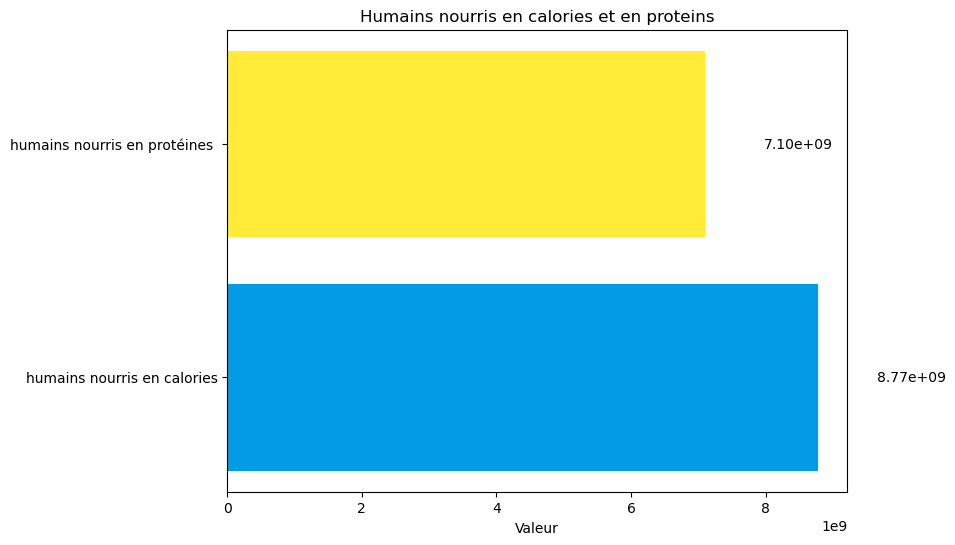

In [197]:
# Provided data
categories = ['humains nourris en calories', 'humains nourris en protéines ']
calories_need = population_cal
vegetable_energy = population_kg

# Plotting a horizontal bar chart (pal)
plt.figure(figsize=(8, 6))
plt.barh(categories, [calories_need,vegetable_energy], color=['#039be5', '#ffeb38'])
plt.xlabel('Valeur')
plt.title('Humains nourris en calories et en proteins')

# Adding values beside the bars
for i, need in enumerate([calories_need, vegetable_energy]):
    plt.text(need + 0.1 * max([calories_need, vegetable_energy]), i, f'{need:.2e}', ha='left', va='center')

plt.show() 

In [198]:
# Calcule du nombre d'humains que l'on peut nourrir en porcentage
cal= (population_cal/Totalpopulation)*100
kg= (population_kg/Totalpopulation)*100

print(f"la population Kcal :{cal.round(2)}%")
print(f"la population kg :{kg.round(2)}%")

la population Kcal :125.36%
la population kg :101.44%


Nous trouvons comme résultat : 

    la population Kcal :125.36%
    la population kg :101.44%

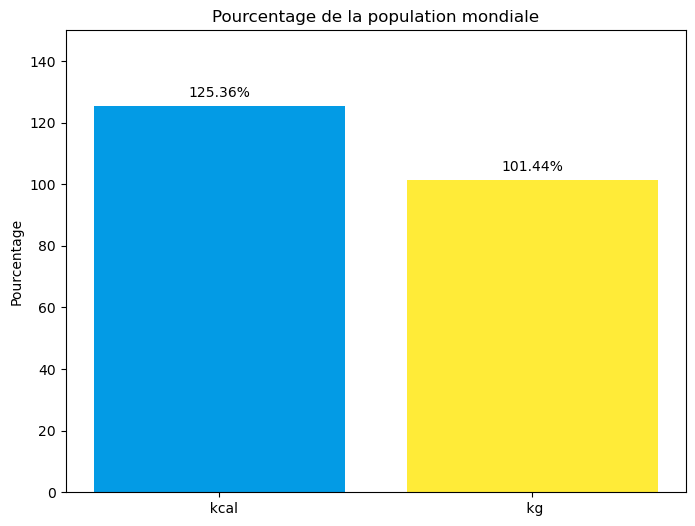

In [199]:
# Provided data
categories = ['  kcal', ' kg']
percentages = [cal, kg]

# Plotting a bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, percentages, color=['#039be5', '#ffeb38'])
plt.ylabel('Pourcentage')
plt.title('Pourcentage de la population mondiale')
plt.ylim(0, 150)  # Adjust the y-axis limits based on your data range

# Adding values on top of the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 2, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

#### Question 8 : Potentiel alimentaire des végétaux (destinés aux animaux pertes)
Combien d'humains pourraient être nourris si toute la disponibilité alimentaire en produits végétaux la nourriture végétale destinée aux animaux et les pertes de produits végétaux étaient utilisés pour de la nourriture ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

In [200]:

# Fonction pour calculer les sommes de calorie et de protéine perdu ou utilisé pour les animeaux 
def Calcule_Total(df_filtre):
    group_df=df_filtre[['Pays', 'Produit', 'Valeur']].groupby(['Pays', 'Produit'],as_index=False).sum()

    group_df=group_df.merge(df_Pro_p, on=[ 'Pays', 'Produit'])
    group_df=group_df[['Pays', 'Produit', 'Valeur', 'protéines']]

    group_df=group_df.merge(df_cal_g, on=[ 'Pays', 'Produit'])
    group_df=group_df[['Pays', 'Produit', 'Valeur', 'protéines', 'cal_g']]

    group_df=group_df.assign(totalproteinesKg=(group_df['Valeur']*1000*1000)*group_df['protéines'])

    group_df=group_df.assign(totalcalKcal=(group_df['Valeur']*1000*1000)*group_df['cal_g'])

    return group_df['totalproteinesKg'].sum(), group_df['totalcalKcal'].sum()

# Fonction pour afficher les résultats
def Totalprint (totalproteinesKg_mode, totalcalKcal_mode):
    
    print(f"La production de calories mondiale est : {totalcalKcal_mode}Kcal")

    print(f"La production de proteines mondiale est : {totalproteinesKg_mode}Kg")
    
    print(f"le nombre d'humains avec les calories : {(totalcalKcal_mode/besionKcal)} humains")

    print(f"le nombre d'humains avec les proteines : {(totalproteinesKg_mode/besion_protéines_kg)} humains")
    

    print(f"Les humains qui peuvent vivre avec les calories mondiale est : {((totalcalKcal_mode/besionKcal)/Totalpopulation)*100} %")
    print(f"Les humains qui peuvent vivre avec les proteines mondiale est : {((totalproteinesKg_mode/besion_protéines_kg)/Totalpopulation)*100} %")

# Création de la data frame
df=FAOSTAT_2013_vegetal
df=df.loc[(df['Élément']=="Aliments pour animaux") | (df['Élément']=="Pertes")] 

# Appel des fonctions
print("-------------vegetal------------------")
totalproteinesKg_mode, totalcalKcal_mode = Calcule_Total(df)
Totalprint(totalproteinesKg_mode, totalcalKcal_mode)

-------------vegetal------------------
La production de calories mondiale est : 3119411511488554.0Kcal
La production de proteines mondiale est : 77487615668.19154Kg
le nombre d'humains avec les calories : 3715796916.6033998 humains
le nombre d'humains avec les proteines : 2653685468.088752 humains
Les humains qui peuvent vivre avec les calories mondiale est : 53.10309847795286 %
Les humains qui peuvent vivre avec les proteines mondiale est : 37.92427947602773 %


Nous trouvons comme résultat : 

    -------------vegetal------------------
    La production de calories mondiale est : 3119411511488554.0Kcal
    La production de proteines mondiale est : 77487615668.19154Kg
    le nombre d'humains avec les calories : 3715796916.6033998 humains
    le nombre d'humains avec les proteines : 2653685468.088752 humains
    Les humains qui peuvent vivre avec les calories mondiale est : 53.10309847795286 %
    Les humains qui peuvent vivre avec les proteines mondiale est : 37.92427947602773 %

In [201]:
# Création des labels et des valeurs
population_cal = ((totalcalKcal_mode/besionKcal)/Totalpopulation)*100
labels = ['Population nourrie (kcal)', 'Population totale']
sizes = [population_cal, 100-population_cal]

# Création du graphique
fig = px.pie(names=labels, values=sizes, height=1000, color_discrete_sequence=color_list_bar,
             title='Population nourrie par les quantités (kcal) de végétaux destinés aux animaux ou perdus', labels=label_px)

# Mise à l'échel et affichage du graphique
fig.update_layout(
    autosize=False,
    width=1000,
    height=800
)
fig.show()

In [202]:
# Création des labels et des valeurs
population_kg = ((totalproteinesKg_mode/besion_protéines_kg)/Totalpopulation)*100
labels = ['Population nourrie (kg de protéines)', 'Population totale']
sizes = [population_kg, 100-population_kg]

# Création du graphique
fig = px.pie(names=labels, values=sizes, height=1000, color_discrete_sequence=color_list_bar,
             title='Population nourrie par les quantités (kg de protéines) de végétaux destinés aux animaux ou perdus', labels=label_px)

# Mise à l'échel et affichage du graphique
fig.update_layout(
    autosize=False,
    width=1000,
    height=800
)
fig.show()

#### Question 9 : Potentiel alimentaire de la dispo. Mondiale
Combien d'humains pourraient être nourris avec la disponibilité alimentaire mondiale ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

In [203]:
m_df_kcal

,Code Pays,Pays,Population,Élément,Code Produit,Produit,Valeur,Kcal
0,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2511,Blé,1369.0,1.526638e+13
1,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2805,Riz (Eq Blanchi),141.0,1.572359e+12
2,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2513,Orge,26.0,2.899385e+11
3,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2514,Maïs,21.0,2.341811e+11
4,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2517,Millet,3.0,3.345444e+10
...,...,...,...,...,...,...,...,...
14236,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2764,"Poissons Marins, Autres",0.0,0.000000e+00
14237,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2765,Crustacés,0.0,0.000000e+00
14238,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2766,Cephalopodes,0.0,0.000000e+00
14239,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2767,"Mollusques, Autres",0.0,0.000000e+00


In [204]:
m_df_protéinesKg

,Code Pays,Pays,Code Produit,Produit,protéinesKg,protéinesg
0,2,Afghanistan,2511,Blé,411601126.8,4.116011e+11
1,2,Afghanistan,2805,Riz (Eq Blanchi),30108996.0,3.010900e+10
2,2,Afghanistan,2513,Orge,8809669.2,8.809669e+09
3,2,Afghanistan,2514,Maïs,6244828.8,6.244829e+09
4,2,Afghanistan,2517,Millet,892118.4,8.921184e+08
...,...,...,...,...,...,...
11556,181,Zimbabwe,2764,"Poissons Marins, Autres",154942.5,1.549425e+08
11557,181,Zimbabwe,2765,Crustacés,0.0,0.000000e+00
11558,181,Zimbabwe,2766,Cephalopodes,0.0,0.000000e+00
11559,181,Zimbabwe,2767,"Mollusques, Autres",0.0,0.000000e+00


In [205]:
# Calcule des sommes de calories et protéines disponible dans le monde
sum_kcal=m_df_kcal.Kcal.sum()
print(sum_kcal, "kcal")
sum_kg=m_df_protéinesKg.protéinesKg.sum()
print(sum_kg, "kg")


7363883420185000.0 kcal
207259180075.55 kg


Nous avons pour résultut :

    7363883420185000.0 kcal
    207259180075.55 kg

In [206]:
# Calcule du nombre d'humain que l'on peux nourrir
person_cal=sum_kcal/besionKcal
person_prot=sum_kg/besion_protéines_kg
print(f"{person_cal} humains")
print(f"{person_prot} humains")

8771749160.434782 humains
7097917125.875 humains


Nous avons pour résultat :

    8771749160.434782 humains
    7097917125.875 humains

In [207]:
print(f"Les humains qui peuvent vivre avec les calories mondiale est : {((person_cal)/Totalpopulation)*100} %")
print(f"Les humains qui peuvent vivre avec les proteines mondiale est : {((person_prot)/Totalpopulation)*100} %")

Les humains qui peuvent vivre avec les calories mondiale est : 125.35858927302776 %
Les humains qui peuvent vivre avec les proteines mondiale est : 101.4375652338479 %


Nous avons pour résultat :

    Les humains qui peuvent vivre avec les calories mondiale est : 125.35858927302776 %
    Les humains qui peuvent vivre avec les proteines mondiale est : 101.4375652338479 %

#### Question 10 : Proportion de la sous-nutrition mondiale
A partir des données téléchargées qui concernent la sous-nutrition, répondez à cette question : Quelle proportion de la population mondiale est considérée comme étant en sous-nutrition ?

In [208]:
# Cleaning sous_alimentation
FAOSTAT_2013_sous_alimentation = FAOSTAT_2013_sous_alimentation.query("Symbole != 'NV'")
df_0=FAOSTAT_2013_sous_alimentation

dPopulation=FAOSTAT_2013_population
dPopulation=dPopulation[['Country Code', 'Country', 'Value']]
dPopulation.loc[:,'Value']=FAOSTAT_2013_population['Value']*1000

# Création du data frame
df_0 = FAOSTAT_2013_sous_alimentation.merge(dPopulation, left_on='Code zone', right_on='Country Code')

df_0['Valeur'].fillna(0, inplace=True)

df_0.rename(columns={'Value': 'Population'}, inplace=True)
df_0=df_0[['Code zone', 'Zone', 'Valeur', 'Symbole', 'Description du Symbole', 'Population']]

# Calcule du pourcentage
population_sous_nutri=df_0['Valeur'].sum()*1e6
df_0=df_0.assign(proportion=df_0['Valeur']*1e6/Totalpopulation)
proportion_mondiale=(population_sous_nutri/Totalpopulation)*100
print(Totalpopulation)
print(f'la proportion de la population mondiale considérée comme en sous-nutrition est {proportion_mondiale.round(2)}%')
Sous_alimentation=df_0
Sous_alimentation


6997326000.0
la proportion de la population mondiale considérée comme en sous-nutrition est 10.57%


,Code zone,Zone,Valeur,Symbole,Description du Symbole,Population,proportion
0,2,Afghanistan,8.1,F,Estimation FAO,30552000,0.001158
1,202,Afrique du Sud,2.6,F,Estimation FAO,52776000,0.000372
2,3,Albanie,0.2,F,Estimation FAO,3173000,0.000029
3,4,Algérie,1.8,F,Estimation FAO,39208000,0.000257
4,79,Allemagne,0.0,<2,Moins de 2 millions de personnes sont sous-ali...,82727000,0.000000
...,...,...,...,...,...,...,...
161,236,Venezuela (République bolivarienne du),1.8,F,Estimation FAO,30405000,0.000257
162,237,Viet Nam,11.1,F,Estimation FAO,91680000,0.001586
163,249,Yémen,7.1,F,Estimation FAO,24407000,0.001015
164,251,Zambie,7.0,F,Estimation FAO,14539000,0.001000


Nous avons pour résultat :

    la proportion de la population mondiale considérée comme en sous-nutrition est 10.57%

In [209]:
# Création des labels et des valeurs
labels = ['Population en sous-nutrition', 'Population totale']
sizes = [population_sous_nutri, Totalpopulation-population_sous_nutri]

# Création du graphique
fig = px.pie(names=labels, values=sizes, height=1000, color_discrete_sequence=color_list_bar,
             title='Pourcentage de la population en sous-nutrition', labels=label_px)

# Mise à l'échel et affichage du graphique
fig.update_layout(
    autosize=False,
    width=1000,
    height=800
)
fig.show()

In [210]:
# Cleaning sous_alimentation
FAOSTAT_2013_sous_alimentation = FAOSTAT_2013_sous_alimentation.query("Symbole != 'NV'")
df_h=FAOSTAT_2013_sous_alimentation.copy()
mask = df_h['Symbole'].str.contains('<')
df_h.loc[mask, 'Valeur'] = df_h.loc[mask, 'Symbole'].str.replace('<', '').astype(float)

dPopulation=FAOSTAT_2013_population
dPopulation=dPopulation[['Country Code', 'Country', 'Value']]
dPopulation.loc[:,'Value']=FAOSTAT_2013_population['Value']*1000

# Création du data frame
df_h = df_h.merge(dPopulation, left_on='Code zone', right_on='Country Code')
df_h.rename(columns={'Value': 'Population'}, inplace=True)
df_h=df_h[['Code zone', 'Zone', 'Valeur', 'Symbole', 'Description du Symbole', 'Population']]

# Calcule du pourcentage  
population_sous_nutri=df_h['Valeur'].sum()*1e6    
df_h=df_h.assign(proportion=df_h['Valeur']*1e6/df_h['Population']*100)
proportion_mondiale=(population_sous_nutri/df_h['Population'].sum())*100

print(f'la proportion de la population mondiale considérée comme en sous-nutrition est {proportion_mondiale.round(2)}%')


la proportion de la population mondiale considérée comme en sous-nutrition est 11.2%


In [211]:
# Création des labels et des valeurs
labels = ['Population sous-nutrition', 'Population totale']
sizes = [population_sous_nutri, Totalpopulation-population_sous_nutri]

# Création du graphique
fig = px.pie(names=labels, values=sizes, height=1000, color_discrete_sequence=color_list_bar,
             title='Pourcentage de la population en sous-nutrition', labels=label_px)

# Mise à l'échel et affichage du graphique
fig.update_layout(
    autosize=False,
    width=1000,
    height=800
)
fig.show()

#### Question 11 : Céréales
Établissez la liste des produits (ainsi que leur code) considéré comme des céréales selon la FAO. En ne prenant en compte que les céréales destinées à l'alimentation (humaine et animale), quelle proportion (en termes de poids) est destinée à l'alimentation animale ?

In [212]:
# Création de la data frame
cereal=FAOSTAT_2013_cereal
 
df_liste_cereal = cereal["Produit"].unique()
print("la liste des céréales est : ",df_liste_cereal)

la liste des céréales est :  ['Blé' 'Riz (Eq Blanchi)' 'Orge' 'Maïs' 'Millet' 'Céréales, Autres'
 'Seigle' 'Avoine' 'Sorgho']


Nous avons pour résultat :

    la liste des céréales est :  ['Blé' 'Riz (Eq Blanchi)' 'Orge' 'Maïs' 'Millet' 'Céréales, Autres' 'Seigle' 'Avoine' 'Sorgho']

In [213]:
cereal=cereal.loc[(cereal['Élément']=='Aliments pour animaux') | (cereal['Élément']=='Nourriture')]
cereal=cereal[['Code Produit', 'Produit', 'Élément','Valeur']]
groupe_cereal=cereal.groupby(['Code Produit','Produit', 'Élément'],as_index=False).sum()

g_cereal = groupe_cereal.pivot(index=['Code Produit', 'Produit'], columns='Élément', values='Valeur').reset_index()
g_cereal=g_cereal.assign(proportion_animale=g_cereal['Aliments pour animaux']/(g_cereal['Aliments pour animaux']+g_cereal['Nourriture'])*100)
g_cereal


Élément,Code Produit,Produit,Aliments pour animaux,Nourriture,proportion_animale
0,2511,Blé,129668.0,457824.0,22.071449
1,2513,Orge,92658.0,6794.0,93.168564
2,2514,Maïs,546116.0,125184.0,81.352004
3,2515,Seigle,8099.0,5502.0,59.547092
4,2516,Avoine,16251.0,3903.0,80.634117
5,2517,Millet,3306.0,23040.0,12.548394
6,2518,Sorgho,24808.0,24153.0,50.668900
7,2520,"Céréales, Autres",19035.0,5324.0,78.143602
8,2805,Riz (Eq Blanchi),33594.0,377286.0,8.176110


In [214]:
# Création des labels et des valeurs
g_cereal=g_cereal.assign(total_animale_nour=(g_cereal['Aliments pour animaux']+g_cereal['Nourriture']))
g_cereal

# Création du graphique
fig = px.pie(g_cereal, names=g_cereal['Produit'], values=g_cereal['total_animale_nour'], color_discrete_sequence=color_list_bar,
             title='Liste des céréales et leurs quantités produites')

# Mise à l'échel et affichage du graphique
fig.update_layout(
    autosize=False,
    width=1000,
    height=800
)
fig.show()

In [215]:
# Calcule de la poportion de céréale destiné aux animaux
proportion_animale=g_cereal['Aliments pour animaux'].sum()/(g_cereal['Aliments pour animaux'].sum()+g_cereal['Nourriture'].sum())*100
print(f"la proportion est : {proportion_animale.round(2)}%")

la proportion est : 45.91%


Nous avons pour résultat :

    la proportion est : 45.91%

In [216]:
# Création des labels et des valeurs
g_cereal.sort_values(by='proportion_animale', ascending=False, inplace=True )
label_px = {'x':'produit', 'y':'proportion de la production pour l\'alimentation animale (%)'}

# Création du graphique
fig = px.bar(x=g_cereal.Produit, y=g_cereal.proportion_animale, height=1000, color_discrete_sequence=color_list_bar,
             title="proportion de la production déstinée à l\'alimentation animale (%)", labels=label_px)

# Mise à l'échel et affichage du graphique
fig.update_layout(
    autosize=False,
    width=1000,
    height=800
)
fig.show()

In [217]:
# Création des labels et des valeurs
labels = ['Céréales pour les animaux', 'Céréales total']
sizes = [proportion_animale, 100-proportion_animale]

# Création du graphique
fig = px.pie(names=labels, values=sizes, height=1000, color_discrete_sequence=color_list_bar,
             title='Pourcentage de Céréales déstinées à l\'alimentation animale', labels=label_px)

# Mise à l'échel et affichage du graphique
fig.update_layout(
    autosize=False,
    width=1000,
    height=800
)
fig.show()

#### Question 12 : Sous-nutrition
Sélectionnez parmi les données des bilans alimentaires les informations relatives aux pays dans lesquels la FAO recense des personnes en sous-nutrition.
Repérez les 15 produits les plus exportés par ce groupe de pays.
Parmi les données des bilans alimentaires au niveau mondial, sélectionnez les 200 plus grandes importations de ces produits (1 importation = une quantité d'un produit donné importée par un pays donné).
Groupez ces importations par produit, afin d'avoir une table contenant 1 ligne pour chacun des 15 produits. Ensuite, calculez pour chaque produit les 2 quantités suivantes :

    • le ratio entre la quantité destinés aux "Autres utilisations" (Other uses) et la disponibilité intérieure.
    • le ratio entre la quantité destinée à la nourriture animale et la quantité destinée à la nourriture (animale + humaine)
    
Donnez les 3 produits qui ont la plus grande valeur pour chacun des 2 ratios (vous aurez donc 6 produits à citer)

In [218]:
# Création du data frame 
# Selection des pays avec de la sous-nutrition
Sous_alimentation_12=Sous_alimentation.sort_values('proportion', ascending=False)
Sous_alimentation_12=Sous_alimentation_12[Sous_alimentation_12['Valeur']>0]
Sous_alimentation_12

,Code zone,Zone,Valeur,Symbole,Description du Symbole,Population,proportion
70,100,Inde,213.1,F,Estimation FAO,1252140000,0.030454
32,41,"Chine, continentale",136.2,F,Estimation FAO,1385567000,0.019465
118,165,Pakistan,38.4,F,Estimation FAO,182143000,0.005488
12,16,Bangladesh,26.4,F,Estimation FAO,156595000,0.003773
52,238,Éthiopie,25.5,F,Estimation FAO,94101000,0.003644
...,...,...,...,...,...,...,...
115,221,Oman,0.2,F,Estimation FAO,3632000,0.000029
42,72,Djibouti,0.2,F,Estimation FAO,873000,0.000029
57,74,Gabon,0.2,F,Estimation FAO,1672000,0.000029
142,199,Slovaquie,0.2,F,Estimation FAO,5450000,0.000029


In [219]:
# selection des 15 produit les plus exportés dans les pays avec de la sous-alimentation
# Valeur_y = Valeur_exportation
df = pd.concat([FAOSTAT_2013_vegetal, FAOSTAT_2013_animal])
df = df[['Code Pays', 'Pays', 'Élément', 'Code Produit', 'Produit', 'Valeur']]
df_Sous_alimentation = Sous_alimentation_12.merge(df, left_on='Code zone', right_on='Code Pays')

df_Sous_alimentation=df_Sous_alimentation[['Code Pays', 'Pays', 'Élément', 'Produit', 'Valeur_y']]
df_expot=df_Sous_alimentation[df_Sous_alimentation['Élément']=='Exportations - Quantité']

df_expot=df_expot.sort_values('Valeur_y', ascending=False)
df_expot=df_expot[['Produit', 'Valeur_y']]
df_expot_group=df_expot.groupby(['Produit']).sum()
df_expot_group=df_expot_group.sort_values('Valeur_y', ascending=False).reset_index()
df_expot_group=df_expot_group.head(15)
df_expot_group

,Produit,Valeur_y
0,Huile de Palme,46285.0
1,Maïs,37888.0
2,Manioc,35843.0
3,Riz (Eq Blanchi),32787.0
4,Sucre Eq Brut,25237.0
5,Blé,24841.0
6,"Légumes, Autres",19948.0
7,Bananes,17805.0
8,"Fruits, Autres",14590.0
9,Lait - Excl Beurre,14486.0


In [220]:
# liste des 15 produits les plus exporté dans les pays touché par la sous-nutrition

df_liste_expot_group = df_expot_group["Produit"].unique()
print("la liste des 15 protuits est : ",df_liste_expot_group)

la liste des 15 protuits est :  ['Huile de Palme' 'Maïs' 'Manioc' 'Riz (Eq Blanchi)' 'Sucre Eq Brut' 'Blé'
 'Légumes, Autres' 'Bananes' 'Fruits, Autres' 'Lait - Excl Beurre' 'Soja'
 'Poissons Pelagiques' 'Tomates' 'Pommes' 'Oranges, Mandarines']


Nous avons pour résultat : 

    la liste 15 protuits est :  ['Huile de Palme' 'Maïs' 'Manioc' 'Riz (Eq Blanchi)' 'Sucre Eq Brut' 'Blé' 'Légumes, Autres' 'Bananes' 'Fruits, Autres' 'Lait - Excl Beurre' 'Soja' 'Poissons Pelagiques' 'Tomates' 'Pommes' 'Oranges, Mandarines']

In [221]:

# Création du data frame des importation
# Valeur = Valeur_importation
df_import = df[df['Élément']=='Importations - Quantité']
df_import=df_import[['Pays', 'Produit', 'Valeur']]

merge_df_import = df_import.merge(df_expot_group, left_on='Produit', right_on='Produit')
merge_df_import


,Pays,Produit,Valeur,Valeur_y
0,Afghanistan,Blé,1173.0,24841.0
1,Afrique du Sud,Blé,1490.0,24841.0
2,Albanie,Blé,360.0,24841.0
3,Algérie,Blé,6343.0,24841.0
4,Allemagne,Blé,5421.0,24841.0
...,...,...,...,...
2532,Venezuela (République bolivarienne du),Poissons Pelagiques,71.0,13680.0
2533,Viet Nam,Poissons Pelagiques,102.0,13680.0
2534,Yémen,Poissons Pelagiques,23.0,13680.0
2535,Zambie,Poissons Pelagiques,8.0,13680.0


In [222]:
# Création de la data frame des 20 plus grand importateurs des 15 produits listé plus haut
dfpays=merge_df_import[['Pays', 'Valeur']]

df_import_pays = dfpays.groupby(['Pays'],as_index=False).sum()

df_import_pays=df_import_pays.sort_values('Valeur', ascending=False)
df_import_pays=df_import_pays.head(20)
df_import_pays

,Pays,Valeur
36,"Chine, continentale",133243.0
171,États-Unis d'Amérique,44692.0
4,Allemagne,38157.0
77,Japon,37263.0
118,Pays-Bas,31137.0
125,Royaume-Uni,27329.0
75,Italie,27089.0
128,République de Corée,23575.0
48,Espagne,23213.0
99,Mexique,21911.0


In [223]:
# liste des 20 pays qui importé le plus les 15 protuits listé plus haut

df_liste_import_pays = df_import_pays["Pays"].unique()
print("la liste des 20 pays est : ",df_liste_import_pays)

la liste des 20 pays est :  ['Chine, continentale' "États-Unis d'Amérique" 'Allemagne' 'Japon'
 'Pays-Bas' 'Royaume-Uni' 'Italie' 'République de Corée' 'Espagne'
 'Mexique' 'Indonésie' 'Égypte' 'Belgique' 'Fédération de Russie' 'France'
 'Algérie' 'Malaisie' "Iran (République islamique d')" 'Arabie saoudite'
 'Nigéria']


Nous avons pour résultat :

    la liste des 20 pays est :  ['Chine, continentale' "États-Unis d'Amérique" 'Allemagne' 'Japon' 'Pays-Bas' 'Royaume-Uni' 'Italie' 'République de Corée' 'Espagne' 'Mexique' 'Indonésie' 'Égypte' 'Belgique' 'Fédération de Russie' 'France' 'Algérie' 'Malaisie' "Iran (République islamique d')" 'Arabie saoudite' 'Nigéria']

In [224]:
# Préparation de la data frame avec les 15 produits
merge_df_import=merge_df_import[['Produit', 'Valeur']]

df_import_produit = merge_df_import.groupby(['Produit'],as_index=False).sum()

df_import_produit=df_import_produit.sort_values('Valeur', ascending=False)

df_import_produit

,Produit,Valeur
1,Blé,185377.0
7,Maïs,122691.0
4,Lait - Excl Beurre,116806.0
12,Soja,102082.0
13,Sucre Eq Brut,61615.0
3,Huile de Palme,48858.0
5,"Légumes, Autres",43333.0
6,Manioc,38370.0
11,Riz (Eq Blanchi),37618.0
8,"Oranges, Mandarines",35011.0


In [225]:
# Création de la data frame avec les 15 produits et les 20 pays
merge_df_produit=df.merge(df_import_produit, left_on='Produit', right_on='Produit')
merge_df_produit.drop('Valeur_y',axis=1, inplace=True)

merge_df_produit.rename(columns={'Valeur_x':'Valeur'}, inplace=True)
merge_df_produit


,Code Pays,Pays,Élément,Code Produit,Produit,Valeur
0,2,Afghanistan,Production,2511,Blé,5169.00
1,2,Afghanistan,Importations - Quantité,2511,Blé,1173.00
2,2,Afghanistan,Variation de stock,2511,Blé,-350.00
3,2,Afghanistan,Disponibilité intérieure,2511,Blé,5992.00
4,2,Afghanistan,Semences,2511,Blé,322.00
...,...,...,...,...,...,...
27664,181,Zimbabwe,Disponibilité de matière grasse en quantité (g...,2763,Poissons Pelagiques,0.06
27665,351,Chine,Disponibilité alimentaire en quantité (kg/pers...,2763,Poissons Pelagiques,0.39
27666,351,Chine,Disponibilité alimentaire (Kcal/personne/jour),2763,Poissons Pelagiques,1.00
27667,351,Chine,Disponibilité de protéines en quantité (g/pers...,2763,Poissons Pelagiques,0.13


In [226]:
merge=merge_df_produit.merge(df_import_pays, left_on='Pays', right_on='Pays')
merge.drop('Valeur_y',axis=1, inplace=True)
merge.rename(columns={'Valeur_x':'Valeur'}, inplace=True)
merge

,Code Pays,Pays,Élément,Code Produit,Produit,Valeur
0,4,Algérie,Production,2511,Blé,3299.00
1,4,Algérie,Importations - Quantité,2511,Blé,6343.00
2,4,Algérie,Variation de stock,2511,Blé,-180.00
3,4,Algérie,Exportations - Quantité,2511,Blé,2.00
4,4,Algérie,Disponibilité intérieure,2511,Blé,9461.00
...,...,...,...,...,...,...
3470,229,Royaume-Uni,Nourriture,2763,Poissons Pelagiques,218.00
3471,229,Royaume-Uni,Disponibilité alimentaire en quantité (kg/pers...,2763,Poissons Pelagiques,3.43
3472,229,Royaume-Uni,Disponibilité alimentaire (Kcal/personne/jour),2763,Poissons Pelagiques,13.00
3473,229,Royaume-Uni,Disponibilité de protéines en quantité (g/pers...,2763,Poissons Pelagiques,1.49


In [227]:
# merge=merge.pivot(index=['Code Produit', 'Produit'], columns='Élément', values='Valeur').reset_index()
# merge

In [228]:

Autres_Utilisations=merge[merge['Élément']=='Autres Utilisations'].Valeur.sum()
#print(Autres_Utilisations)
disponibilité_intérieure=merge[merge['Élément']=='Disponibilité intérieure'].Valeur.sum()
#print(disponibilité_intérieure)
radio1=(Autres_Utilisations/disponibilité_intérieure*100).round(2)
print(f'le ratio entre la quantité destinés aux "Autres utilisations" (Other uses) et la disponibilité intérieure est {radio1} %')

Aliments_pour_animaux=merge[merge['Élément']=='Aliments pour animaux'].Valeur.sum()

Nourriture=merge[merge['Élément']=='Nourriture'].Valeur.sum()

radio2=(Aliments_pour_animaux/(Aliments_pour_animaux+Nourriture)*100).round(2)
print(f'le ratio entre la quantité destinée à la nourriture animale et la quantité destinée à la nourriture (animale + humaine) est {radio2} %')


le ratio entre la quantité destinés aux "Autres utilisations" (Other uses) et la disponibilité intérieure est 8.59 %
le ratio entre la quantité destinée à la nourriture animale et la quantité destinée à la nourriture (animale + humaine) est 26.61 %


In [232]:
# on crée le data frame pour tableau demendé
merge_produit = merge.groupby(['Produit', 'Élément'],as_index=False).sum()

merge_produit.drop('Code Pays',axis=1, inplace=True)
merge_produit.drop('Pays',axis=1, inplace=True)
merge_produit.drop('Code Produit',axis=1, inplace=True)

merge_produit 

,Produit,Élément,Valeur
0,Bananes,Disponibilité alimentaire (Kcal/personne/jour),294.00
1,Bananes,Disponibilité alimentaire en quantité (kg/pers...,173.40
2,Bananes,Disponibilité de matière grasse en quantité (g...,1.14
3,Bananes,Disponibilité de protéines en quantité (g/pers...,3.99
4,Bananes,Disponibilité intérieure,32523.00
...,...,...,...
201,Tomates,Nourriture,87933.00
202,Tomates,Pertes,7138.00
203,Tomates,Production,99387.00
204,Tomates,Traitement,0.00


Autres methodes avec pivot pour fitrer par Pays et produit:

In [231]:

m=merge_produit.pivot_table(index=['Produit'],columns='Élément', values='Valeur', aggfunc='sum')
m

Élément,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Produit,,,,,,,,,,,,,,,
Bananes,NaN,NaN,294.0,173.40,1.14,3.99,32523.0,3451.0,14479.0,28246.0,4203.0,21493.0,NaN,74.0,1.0
Blé,83703.0,11175.0,13853.0,1791.01,60.35,423.39,352038.0,95185.0,95472.0,225910.0,9178.0,352725.0,16891.0,5225.0,-977.0
"Fruits, Autres",0.0,11.0,618.0,498.67,7.35,7.97,102031.0,14505.0,20001.0,92818.0,7401.0,96089.0,NaN,1868.0,446.0
Huile de Palme,NaN,19171.0,1429.0,58.73,161.48,0.28,26037.0,46562.0,25559.0,6688.0,286.0,47379.0,NaN,3.0,-337.0
Lait - Excl Beurre,27263.0,10974.0,3991.0,2764.28,232.20,248.91,320273.0,62862.0,75660.0,279436.0,3262.0,305806.0,NaN,155.0,1673.0
"Légumes, Autres",39785.0,1.0,1318.0,1815.61,10.33,63.60,641328.0,31648.0,28999.0,550737.0,50784.0,643821.0,14.0,160.0,155.0
Manioc,50030.0,18140.0,406.0,170.24,0.91,2.01,115089.0,962.0,34442.0,35155.0,9333.0,81609.0,NaN,2430.0,0.0
Maïs,380176.0,181303.0,3119.0,379.88,31.54,75.65,676203.0,37756.0,80998.0,53203.0,18127.0,678688.0,3303.0,40093.0,-45732.0
"Oranges, Mandarines",NaN,1.0,354.0,478.33,1.33,6.28,59038.0,17708.0,24747.0,56114.0,2916.0,52996.0,NaN,24.0,-992.0


In [ ]:
m=m.fillna(0)
m

Élément,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Produit,,,,,,,,,,,,,,,
Bananes,0.0,0.0,294.0,173.40,1.14,3.99,32523.0,3451.0,14479.0,28246.0,4203.0,21493.0,0.0,74.0,1.0
Blé,83703.0,11175.0,13853.0,1791.01,60.35,423.39,352038.0,95185.0,95472.0,225910.0,9178.0,352725.0,16891.0,5225.0,-977.0
"Fruits, Autres",0.0,11.0,618.0,498.67,7.35,7.97,102031.0,14505.0,20001.0,92818.0,7401.0,96089.0,0.0,1868.0,446.0
Huile de Palme,0.0,19171.0,1429.0,58.73,161.48,0.28,26037.0,46562.0,25559.0,6688.0,286.0,47379.0,0.0,3.0,-337.0
Lait - Excl Beurre,27263.0,10974.0,3991.0,2764.28,232.20,248.91,320273.0,62862.0,75660.0,279436.0,3262.0,305806.0,0.0,155.0,1673.0
"Légumes, Autres",39785.0,1.0,1318.0,1815.61,10.33,63.60,641328.0,31648.0,28999.0,550737.0,50784.0,643821.0,14.0,160.0,155.0
Manioc,50030.0,18140.0,406.0,170.24,0.91,2.01,115089.0,962.0,34442.0,35155.0,9333.0,81609.0,0.0,2430.0,0.0
Maïs,380176.0,181303.0,3119.0,379.88,31.54,75.65,676203.0,37756.0,80998.0,53203.0,18127.0,678688.0,3303.0,40093.0,-45732.0
"Oranges, Mandarines",0.0,1.0,354.0,478.33,1.33,6.28,59038.0,17708.0,24747.0,56114.0,2916.0,52996.0,0.0,24.0,-992.0


In [ ]:
m['R_Autres_Disponibilité intérieure']=m['Autres Utilisations']/m['Disponibilité intérieure']
m['R_animaux_Nourriture']=m['Aliments pour animaux']/(m['Aliments pour animaux']+m['Nourriture'])
#m=m.reset_index()
df_R=m[['R_Autres_Disponibilité intérieure', 'R_animaux_Nourriture']]
#m=m.iloc[:, -2:]
df_R+df_R.fillna(0)

Élément,R_Autres_Disponibilité intérieure,R_animaux_Nourriture
Produit,,
Bananes,0.000000,0.000000
Blé,0.063487,0.540694
"Fruits, Autres",0.000216,0.000000
Huile de Palme,1.472597,0.000000
Lait - Excl Beurre,0.068529,0.177783
"Légumes, Autres",0.000003,0.134745
Manioc,0.315234,1.174620
Maïs,0.536238,1.754474
"Oranges, Mandarines",0.000034,0.000000


In [ ]:
# m=m[(m.index.get_level_values('Pays')=='Algérie') & (m.index.get_level_values('Produit')=='Blé')] # le filtre

#### Question 13 : USA
Combien de tonnes de céréales pourraient être libérées si les USA diminuaient leur production de produits animaux de 10% ?

In [ ]:
# Création du data frame
usa=FAOSTAT_2013_cereal
usa=usa.loc[(usa['Pays']=="États-Unis d'Amérique")&(usa['Élément']=="Aliments pour animaux")]
usa=usa[['Code Produit', 'Produit', 'Unité', 'Valeur']]

# Calcule de la quantité de céréales utilisé pour produir 10% des produits animaux
usa=usa.assign(Valeur_10_tonne=(usa['Valeur']*0.1)*1000)
print(f"10% de la production de produits animaux est: {usa['Valeur_10_tonne'].sum().round(2) } Tonnes")
usa

10% de la production de produits animaux est: 14009600.0 Tonnes


,Code Produit,Produit,Unité,Valeur,Valeur_10_tonne
4902,2511,Blé,Milliers de tonnes,6196.0,619600.0
4930,2513,Orge,Milliers de tonnes,1440.0,144000.0
4944,2514,Maïs,Milliers de tonnes,128024.0,12802400.0
4958,2515,Seigle,Milliers de tonnes,184.0,18400.0
4971,2516,Avoine,Milliers de tonnes,1430.0,143000.0
4982,2517,Millet,Milliers de tonnes,394.0,39400.0
4989,2518,Sorgho,Milliers de tonnes,2351.0,235100.0
5002,2520,"Céréales, Autres",Milliers de tonnes,77.0,7700.0


Nous avons pour résultat :

    10% de la production de produits animaux est: 14009600.0 Tonnes

In [ ]:
# Création des labels et des valeurs
usa.sort_values(by='Valeur_10_tonne', ascending=False, inplace=True )
label_px = {'x':'produit', 'y':'Qantité de céréales (tonnes)'}

# Création du graphique
fig = px.bar(x=usa.Produit, y=usa.Valeur_10_tonne, height=1000, color_discrete_sequence=color_list_bar,
             title="Qantité de céréales (tonnes) libérées par la réduction de la production des produits animaux pour les USA", labels=label_px)

# Mise à l'échel et affichage du graphique
fig.update_layout(
    autosize=False,
    width=1000,
    height=800
)
fig.show()

#### Question 14 : Thaïlande
En Thaïlande, quelle proportion de manioc est exportée ? Quelle est la proportion de personnes en sous-nutrition?

In [ ]:
FAOSTAT_2013_sous_alimentation

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,21001,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,8.1,F,Estimation FAO
1,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6132,Valeur,21001,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,2.6,F,Estimation FAO
2,FS,Données de la sécurité alimentaire,3,Albanie,6132,Valeur,21001,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,0.2,F,Estimation FAO
3,FS,Données de la sécurité alimentaire,4,Algérie,6132,Valeur,21001,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,1.8,F,Estimation FAO
4,FS,Données de la sécurité alimentaire,79,Allemagne,6132,Valeur,21001,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,NaN,<2,Moins de 2 millions de personnes sont sous-ali...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,FS,Données de la sécurité alimentaire,236,Venezuela (République bolivarienne du),6132,Valeur,21001,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,1.8,F,Estimation FAO
200,FS,Données de la sécurité alimentaire,237,Viet Nam,6132,Valeur,21001,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,11.1,F,Estimation FAO
201,FS,Données de la sécurité alimentaire,249,Yémen,6132,Valeur,21001,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,7.1,F,Estimation FAO
202,FS,Données de la sécurité alimentaire,251,Zambie,6132,Valeur,21001,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,7.0,F,Estimation FAO


In [ ]:
# Création de la data frame
Tai=FAOSTAT_2013_vegetal
Tai=Tai.loc[(Tai['Pays']=="Thaïlande")&(Tai['Produit']=="Manioc")]
export=Tai[Tai['Élément']=="Exportations - Quantité"].Valeur.sum()*1000

# Calcule de la production de manioc
production=Tai[Tai['Élément']=="Production"].Valeur.sum()*1000
print(f"la Proportion de manioc exportée est {(export/(production)*100).round(2)} %")

# Calcule de la sous-nutrition
Population_tai = FAOSTAT_2013_population.loc[FAOSTAT_2013_population['Country Code']=="216"]['Value'].sum()*1000
pop_tai_sous_nourit = FAOSTAT_2013_sous_alimentation.loc[FAOSTAT_2013_sous_alimentation['Zone']=="Thaïlande"]['Valeur'].sum()*1000000
sous_nutrition = (pop_tai_sous_nourit/Population_tai)*100
print(f"la proportion de personnes en sous-nutrition est: {sous_nutrition.round(2)} %")
print('Population_tai =', Population_tai, 'pop_tai_sous_nourit =', pop_tai_sous_nourit)

la Proportion de manioc exportée est 83.41 %
la proportion de personnes en sous-nutrition est: 9.1 %
Population_tai = 67011000 pop_tai_sous_nourit = 6100000.0


Nous avons pour résultat :

    la Proportion de manioc exportée est 83.41 %
    la proportion de personnes en sous-nutrition est: 9.1 %

In [ ]:
# Création des labels et des valeurs
labels = ['manioc exporté', 'autre']
sizes = [export, production-export]

# Création du graphique
fig = px.pie(names=labels, values=sizes, height=1000, color_discrete_sequence=color_list_bar,
             title='Pourcentage de manioc exporté par raport à la quantité produite', labels=label_px)

# Mise à l'échel et affichage du graphique
fig.update_layout(
    autosize=False,
    width=1000,
    height=800
)
fig.show()

In [ ]:
# Vos données

# Création des labels et des valeurs
labels = ['la proportion en sous-nutrition', 'autre']
sizes = [pop_tai_sous_nourit, Population_tai-pop_tai_sous_nourit]

# Création du graphique
fig = px.pie(names=labels, values=sizes, height=1000, color_discrete_sequence=color_list_bar,
             title='Pourcentage de la population en sous-nutrition', labels=label_px)

# Mise à l'échel et affichage du graphique
fig.update_layout(
    autosize=False,
    width=1000,
    height=800
)
fig.show()